<a href="https://colab.research.google.com/github/ayush2281/Pytorch-for-ML-DL-/blob/main/Chapter_01_Pytorch_Workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Pytorch Workflow
Let's Explore a an example Pytorch end-to-end workflow.

Resources:
* Ground Truth notebook - https://github.com/mrdbourke/pytorch-deep-learning/blob/main/01_pytorch_workflow.ipynb

*Book version of notebook

what_were_covering =  1: 'Data (prepare and load)'
                       
                       
                       2: build Model
                       3: 'fiting model to the data (training)'
                       4: 'making the  predicition and evaluating a model (inference)'
                       5: 'saving and loading a model'
                       6: 'putting it all together'
                       
                      
                    

In [2]:
import torch
from torch import nn # nn contains all of pytorch's building block for nn
import matplotlib.pyplot as plt

# check the Pytorch version
torch.__version__


'2.4.1+cu121'

1. 'Data (prepare and load)'
data can be ananything in the ml.


Data can all most anythingf.. i n ml

* Excel speadsheet
* image of any kind
* video (YOutu be has lots of data)
* Audio like songs or podcast
* DNA
* TEXT

## Ml is game of two part:
1. Get Data into a numerical representation
2. build a model to learn a pattern in that numerical representation

To showcae this , lets create some *knwon* data using the linear regression formula.

We'll  use linear regression formula to make a straight line with known parameter.

In [3]:
# Create *known* parameter
weight = 0.7
bias = 0.5

# create a data
start =0
end =1
step = 0.02
# x = torch.arange(start,end,step).unsqueeze(dim=1)
x = torch.arange(start,end,step)

y = weight * x + bias

x[:10],y[:10], len(x), len(y)

(tensor([0.0000, 0.0200, 0.0400, 0.0600, 0.0800, 0.1000, 0.1200, 0.1400, 0.1600,
         0.1800]),
 tensor([0.5000, 0.5140, 0.5280, 0.5420, 0.5560, 0.5700, 0.5840, 0.5980, 0.6120,
         0.6260]),
 50,
 50)

In [4]:
len(x), len(y)

(50, 50)

  spliting data into training and testing sets (one of the most important concept in machine learning in general)

lets create an train and test with our data

In [5]:
# create an train test split
train_split  = int(0.8 * len(x))
x_train, y_train = x[:train_split], y[:train_split]
x_test, y_test = x[train_split:], y[train_split:]

len(x_train), len(y_train), len(x_test), len(y_test)

(40, 40, 10, 10)

In [6]:
x_train, y_train

(tensor([0.0000, 0.0200, 0.0400, 0.0600, 0.0800, 0.1000, 0.1200, 0.1400, 0.1600,
         0.1800, 0.2000, 0.2200, 0.2400, 0.2600, 0.2800, 0.3000, 0.3200, 0.3400,
         0.3600, 0.3800, 0.4000, 0.4200, 0.4400, 0.4600, 0.4800, 0.5000, 0.5200,
         0.5400, 0.5600, 0.5800, 0.6000, 0.6200, 0.6400, 0.6600, 0.6800, 0.7000,
         0.7200, 0.7400, 0.7600, 0.7800]),
 tensor([0.5000, 0.5140, 0.5280, 0.5420, 0.5560, 0.5700, 0.5840, 0.5980, 0.6120,
         0.6260, 0.6400, 0.6540, 0.6680, 0.6820, 0.6960, 0.7100, 0.7240, 0.7380,
         0.7520, 0.7660, 0.7800, 0.7940, 0.8080, 0.8220, 0.8360, 0.8500, 0.8640,
         0.8780, 0.8920, 0.9060, 0.9200, 0.9340, 0.9480, 0.9620, 0.9760, 0.9900,
         1.0040, 1.0180, 1.0320, 1.0460]))

How might we better visualize out data?

this is where the data explore's motto comes in!

'Visalise , Visualizwe, Visualizse'



In [7]:
def plot_prediction(train_data=x_train,
                    train_labels = y_train,
                    test_data = x_test,
                    test_labels = y_test,
                    prediciton =None):
  """
  Plots training data, test data and compares predicitons

  """
  #plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="training data")

  #plot test data in red
  plt.scatter(test_data, test_labels, c="r", s=4, label="test data")

  # are there prediction

  if prediciton is not None:
    #plot the predicition if they exist
    plt.scatter(test_data, prediciton, c="g", s=4, label="prediciton data")

  #show the legend
  plt.legend(prop={"size":14})


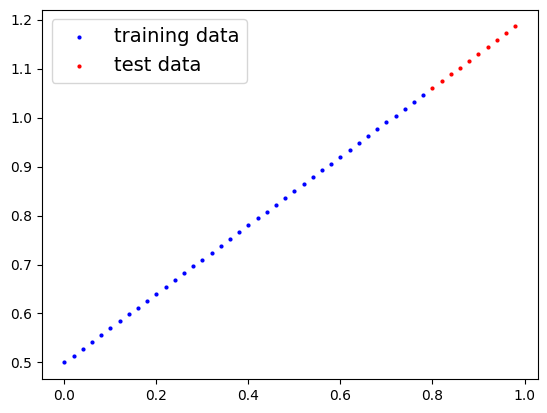

In [8]:
plot_prediction();

##2. Building  a model!

wohhh that's exciting, let's do it!

## What Our doesweight and bias
* starts with random values (weight and bias)
* look at the training data and adjust the random values to better represent (or get to the *closer*) to tge ideal values (the weight & bias values we used to create tye data)

## How does it to do so ?
1. Gradient descent --> resource -> YT(3blue1brown)
2. Backpropagation --> resource -> YT(3blue1brown)

In [9]:
import torch
import torch.nn as nn

# create an linear model
class linearRegreassionModel(nn.Module): # subclass nn.module
    def __init__(self):
        super().__init__()
        # initialize the model parameter
        # (requires_grad=True) means pytorch will track the gradient of this specific parameter for use with torch.autograd and gradient descent
        self.weights = nn.Parameter(torch.randn(1,
                                                dtype=torch.float, # corrected 'dtpe' to 'dtype'
                                                requires_grad=True)) # moved requires_grad and dtype to keyword arguments
        self.bias = nn.Parameter(torch.randn(1,
                                             dtype=torch.float, # corrected 'dtpe' to 'dtype'
                                             requires_grad=True)) # moved requires_grad and dtype to keyword arguments

    # forward method to define the computational in the model, 'x' is the input
    def forward(self, x: torch.Tensor): # corrected 'forword' to 'forward'
      return self.weights * x + self.bias # this is the linear regression formula

##pytorch module
   1. torch.nn
   2. torch.nn.Module
   3. torch.optim
   4. torch.utils.data.dataset
   5. torch.utils.data.DataLoader
   6. torch.nn.Parameter

   *for more visit this page* https://pytorch.org/tutorials/beginner/ptcheat.html


### pytorch model building essential

 **PytorchModule** |  **What does it do**
* torch.nn --> contains all buildings for computational graphs (a neural * network can we consider a computational graph)
* torch.nn.Parameter -what parametr should our model try and lern , often a pytorch layer from torch.nn will set these for   us
* torch.nn.module - the base clss for all neural network modules , if you subclass it , should overwrite forword()

In [10]:
torch.manual_seed(42)
torch.randn(1)

tensor([0.3367])

## checkings the contains of our Pytorch model

Now we've created a model, let's see whats  inside it.

so we can checklout model parameters or whats inside our model uisng .parameter().

In [11]:
## creare an random seed
torch.manual_seed(42)

# create an instance of the model (this is a subclass od nn.Module)
model_0 = linearRegreassionModel()

list(model_0.parameters())


[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [12]:
# list the named parameter
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [13]:
weight , bias

(0.7, 0.5)

check why the both weigt and bias value is different.

### making prediction using torch.inference_mode()

To check our model predictive power , lts see how well it predictes y_test base on X_test.

wehn we pass daata through our model , its going to rin it through the forward() method.

In [14]:
x_test, y_test

(tensor([0.8000, 0.8200, 0.8400, 0.8600, 0.8800, 0.9000, 0.9200, 0.9400, 0.9600,
         0.9800]),
 tensor([1.0600, 1.0740, 1.0880, 1.1020, 1.1160, 1.1300, 1.1440, 1.1580, 1.1720,
         1.1860]))

In [15]:
# yeah this one and next one have same output but it contains the gradient and another one not contain the gradient calculation
y_preds= model_0(x_test)
y_preds



tensor([0.3982, 0.4049, 0.4116, 0.4184, 0.4251, 0.4318, 0.4386, 0.4453, 0.4520,
        0.4588], grad_fn=<AddBackward0>)

In [16]:
 # make prediction with model
# with torch.inference_mode(): # pytorch.inference disable the gradient calculation(weight)
#   y_preds = model_0(x_test)

# y_preds

with torch.no_grad(): # the both snipets having same output and in othr words youy can you use either one.
  y_preds = model_0(x_test)
y_preds


tensor([0.3982, 0.4049, 0.4116, 0.4184, 0.4251, 0.4318, 0.4386, 0.4453, 0.4520,
        0.4588])

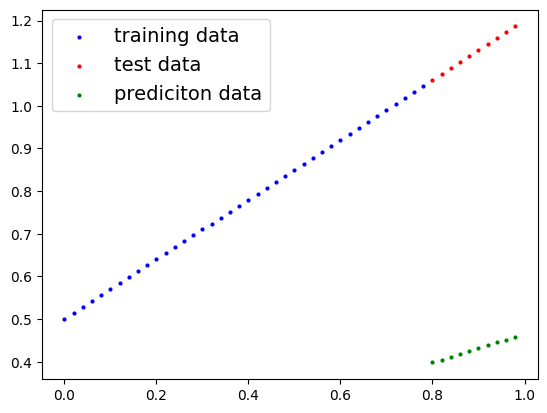

In [17]:
plot_prediction(prediciton=y_preds)

## 3. train mdoel
* The whole idea is training for a model to move from some unknown parameter (these may be random) to some known parameter.
* or in other words froma poor representaion of the data to a better representation of the data.

* oneway to measure how poor/ wrong model are . use loss function

*Note* : Loss function may also called cost fucntion or criteria in different areas .

**Loss Fucntion** A fucntion to measure how wrong ur model prediction are to the ideal/actual output, Lower is better.

**optimizer** : takes into account the loss funtion  of a model and adjust the model parameter(e.g. weight & bias)

And specially for pytorch ⁉
1. A training loop
2. A testing loop

*for more visit:* https://pytorch.org/docs/stable/nn.html#loss-functions

In [18]:
# checkout the model paramter(a parametr is a value that tghe model sets itself)
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [19]:
# using the Mean absolute error to calculate how much function is wrongh
MAE_loss = torch.mean(torch.abs(y_preds - y_test))
MAE_loss

tensor(0.6945)

In [20]:
#setup the losss function
loss_fn = nn.L1Loss()


#setup optimizer
optimizeer =  torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01)  #learning_rate - >,the small learning rate small change in parameter, the large parameter the large change in parameter
optimizeer

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.01
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)

which loss funtion and optimizer i should use...--> nn.L1Loss() ,
torch.optimSGD()

### Building a training and test  looop in pytorch

A couple of thing we need in a training loop:
0. Loop throgh the data
1. forword pass (this involve data moving throgh our models forword()' fucntion) to make prediciton on data - also called forword propagation
2. calculate the loss fucntion (compare forword passs prediction to ground truth labels)
3. Optimizeer zero grad
4. loss backword - move backwisse through the network to calculate the gradient of each of the parameter of our model with respect to the loss(**backpropogation**)
5. optimizer step - use the optimizer to adjust models parameter to try and improve the loss.(**Gradient descent**)


In [21]:
with torch.no_grad():
  list(model_0.parameters())

In [22]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [23]:
# an epochs is the one loop through the data .. (this is hyperparameter because we've set)
epochs = 1

##Training
# 0 Loop throgh the data
for epochs in range(epochs):
  # set the model to training data
  model_0.train() # train mode  in pytorch set all parameter that require gradient to require gradient

  model_0.eval() # turns of gradient tracking
  # 1. forward pass
  y_preds = model_0(x_train)

  # 2. calculate the loss
  loss = loss_fn(y_preds, y_train)

  # 3. optimizer zero grad
  optimizeer.zero_grad()

  # 4. loss backword
  loss.backward()

  # 5. optimizer step
  optimizeer.step() ## by default how the optimizeer change will accumulate through the loop so.. we have to zero them in step 3 for the next itteration of the loop.

  model_0.eval()



In [1]:
weight, bias

NameError: name 'weight' is not defined